This notebook has an implementation with the matrix notation of the simplex

Given the following Linear Program:

$$
\begin{matrix}
\max z = & 4 x_1 & + & 3 x_2 \\
s.t.    &   x_1 &   &       & \le  8 \\
        &       &   &   x_2 & \le  6 \\
        &   x_1 & + & 2 x_2 & \le 15 \\
        & 2 x_1 & + &   x_2 & \le 18 \\
\end{matrix}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

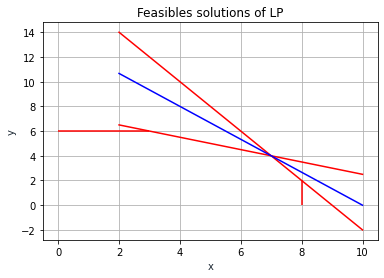

In [2]:
plt.vlines(x = 8, ymin = 0, ymax = 2, color='red')
plt.hlines(y = 6, xmin = 0, xmax = 3, color='red')
x1 = np.linspace(2,10,100)
plt.plot(x1, 15/2 - (1/2)*x1, '-r')
plt.plot(x1, 18 - 2*x1, '-r')
plt.plot(x1, 40/3-(4/3)*x1, '-b')
x = np.linspace(0,6,100)
y = np.linspace(0,6,100)
plt.title('Feasibles solutions of LP')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.grid()
plt.show()

We introduce one slack variable u_i per constraint to have the standard form.

0 is a feasible solution, the initial base is (u_1, u_2, u_3, u_4) = (0, 0, 0, 0)

In [3]:
c = np.array([4, 3, 0, 0, 0, 0])
A = np.array([[1, 0, 1, 0, 0, 0],
              [0, 1, 0, 1, 0, 0],
              [1, 2, 0, 0, 1, 0],
              [2, 1, 0, 0, 0, 1]])
b = np.array([[8], [6], [15], [18]])
var_names = ["x1", "x2", "u1", "u2", "u3", "u4"]

In [4]:
base = np.array([0, 0, 1, 1, 1, 1])
base = np.argwhere(base)
x_N = np.zeros((2, 1))
index_N = np.array([0, 1])
index_B = np.array([2, 3, 4, 5])

while True:
    print("-" * 20)
    c_N = c[index_N]
    c_B = c[index_B]
    B = A[:, index_B]
    N = A[:, index_N]
    B_inv = np.linalg.inv(B)
    π = c_B @ B_inv
    x_B = B_inv @ b
    x_N = B_inv @ N
    reduced_costs = c_N - π @ N
    
    z = c_B.T @ x_B
    print(f"Current objective = {z}") 

    print(f"Reduced costs {reduced_costs}")
    if np.alltrue(reduced_costs <= 0):
        break
    
    print("Il y a encore des coûts réduits positifs qui permettent d'améliorer l'objectif")

    variable_qui_entre_en_base_index_N = np.argmax(reduced_costs)
    variable_qui_entre_en_base = index_N[variable_qui_entre_en_base_index_N]
    x_N_ = x_B / x_N[:, variable_qui_entre_en_base_index_N][np.newaxis].T
    variable_qui_sortant_base_B_to_N = np.argmin(np.ma.masked_less_equal(x_N_, 0.0, copy=False))
    variable_qui_sortant_base = index_B[variable_qui_sortant_base_B_to_N]
    print(f"La variable {var_names[variable_qui_entre_en_base]} entre, la variable {var_names[variable_qui_sortant_base]} sort")
    
    index_N[variable_qui_entre_en_base_index_N] = variable_qui_sortant_base
    index_B[variable_qui_sortant_base_B_to_N] = variable_qui_entre_en_base
    
print(f"x_B = {np.append(index_B[np.newaxis].T, x_B, axis=1)}")
print(f"π = {π}")

--------------------
Current objective = [0.]
Reduced costs [4. 3.]
Il y a encore des coûts réduits positifs qui permettent d'améliorer l'objectif
La variable x1 entre, la variable u1 sort
--------------------
Current objective = [32.]
Reduced costs [-4.  3.]
Il y a encore des coûts réduits positifs qui permettent d'améliorer l'objectif
La variable x2 entre, la variable u4 sort
--------------------
Current objective = [38.]
Reduced costs [ 2. -3.]
Il y a encore des coûts réduits positifs qui permettent d'améliorer l'objectif
La variable u1 entre, la variable u3 sort
--------------------
Current objective = [40.]
Reduced costs [-0.66666667 -1.66666667]
x_B = [[0. 7.]
 [3. 2.]
 [2. 1.]
 [1. 4.]]
π = [0.         0.         0.66666667 1.66666667]


/tmp/ipykernel_9395/2249264021.py:30: RuntimeWarning: divide by zero encountered in true_divide
  x_N_ = x_B / x_N[:, variable_qui_entre_en_base_index_N][np.newaxis].T


In [5]:
import pyomo.environ as pyo

model = pyo.ConcreteModel()
model.x1 = pyo.Var()
model.x2 = pyo.Var()
model.o = pyo.Objective(expr=4 * model.x1 + 3 * model.x2, sense = pyo.maximize)
model.c1 = pyo.Constraint(expr=model.x1 <= 8)
model.c2 = pyo.Constraint(expr=model.x2 <= 6)
model.c3 = pyo.Constraint(expr=model.x1 + 2 * model.x2 <= 15)
model.c4 = pyo.Constraint(expr=2 * model.x1 + model.x2 <= 18)
model.rc = pyo.Suffix(direction=pyo.Suffix.IMPORT)
model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

In [6]:
solver = pyo.SolverFactory("cbc")
solver.solve(model)

{'Problem': [{'Name': 'unknown', 'Lower bound': 40.0, 'Upper bound': 40.0, 'Number of objectives': 1, 'Number of constraints': 5, 'Number of variables': 3, 'Number of nonzeros': 2, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'User time': -1.0, 'System time': 0.0, 'Wallclock time': 0.0, 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': None, 'Number of created subproblems': None}, 'Black box': {'Number of iterations': 2}}, 'Error rc': 0, 'Time': 0.014162302017211914}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [7]:
pyo.value(model.x1), pyo.value(model.x2)

(7.0, 4.0)

In [8]:
(model.c1.uslack(), model.c2.uslack(), model.c3.uslack(), model.c4.uslack())

(1.0, 2.0, 0.0, 0.0)

In [9]:
model.dual.pprint()

dual : Direction=Suffix.IMPORT, Datatype=Suffix.FLOAT
    Key : Value
     c1 :       -0.0
     c2 :       -0.0
     c3 : 0.66666667
     c4 :  1.6666667
